<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/EDA_FundamentosML_EduardoGonzalez/blob/main/Evaluacion1EduardoGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Primero haremos un breve ánalisis de exploración donde veremos:
- Identificación y descripción de variables.
- Medidas estadísticas (Media, mediana, etc)
- Cálculo medidas de dispersión (Varianza, desviación estándar, etc)
- Histograma y análisis de asimetría.
- Boxplots
- Frecuencia de variables categóricas.
- Detección de valores atípicos.

Para posteriormente pasar a un desafío donde analizaremos distintos grupos específicos.

Empecemos por cargar el archivo 'marketing_campaign.csv'

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep="\t")
df.head(10)

Saving marketing_campaign.csv to marketing_campaign.csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


# Identificación y descripción de variables

Extrae los nombres de las variables categóricas del DataFrame
'object' es el tipo de dato usado comúnmente para texto (strings) en pandas
Extrae los nombres de las variables numéricas del DataFrame
Incluye enteros (int64) y decimales (float64)
Muestra en pantalla las listas de variables categóricas y numéricas

In [ ]:
categorical_vars = df.select_dtypes(include='object').columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:", categorical_vars)
print("Variables numéricas:", numerical_vars)

Variables categóricas: ['Education', 'Marital_Status', 'Dt_Customer']
Variables numéricas: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


**Descripción de variables:**

**Variables Categóricas:**
*   ***Education:*** Nivel educativo del cliente
*   ***Marital_Status:*** Estado civil del cliente
*   ***Dt_Customer:*** Fecha en la que el cliente se unió a la empresa
*   ***Complain:*** Si el cliente ha presentado alguna queja (1=Sí, 0=No)(categórica binaria)
*   ***AcceptedCmp1 a AcceptedCmp5:*** Variables binarias que indican si el cliente aceptó campañas anteriores (categórica binaria)
*   ***Z_CostContact:*** Coste del contacto para la campaña (constante)
*   ***Z_Revenue:*** Ingreso del cliente para una campaña (constante)

**Variables numéricas:**

*   ***ID***: Identificador único del cliente.
*   ***Year_Birth***: Año de nacimiento del cliente (sirve para calcular edad).
*   ***Income***: Ingreso anual del cliente (en moneda local).
*   ***Kidhome***: Número de hijos pequeños en el hogar.
*   ***Teenhome***: Número de adolescentes en el hogar.
*   ***Recency***: Días desde la última compra del cliente.
*   ***MntWines***: Monto gastado en vino en los últimos 2 años.
*   ***MntFruits***: Monto gastado en frutas.
*   ***MntMeatProducts***: Monto gastado en productos cárnicos.
*   ***MntFishProducts***: Monto gastado en pescados y mariscos.
*   ***MntSweetProducts***: Monto gastado en productos dulces.
*   ***MntGoldProds***: Monto gastado en productos de oro.
*   ***NumDealsPurchases***: Número de compras con descuento realizadas.
*   ***NumWebPurchases***: Número de compras hechas por la web.
*   ***NumCatalogPurchases***: Compras realizadas vía catálogo.
*   ***NumStorePurchases***: Compras realizadas en tienda física.
*   ***NumWebVisitsMonth***: Número de visitas al sitio web en el último mes.









# Preprocesamiento de datos (MEJORA)

Antes del análisis, se eliminan o imputan valores nulos cuando es necesario, se normalizan algunos campos, y se corrigen los tipos de datos (por ejemplo, fechas o ingresos faltantes). Esto asegura que las estadísticas y gráficos sean representativos de la muestra válida.


In [ ]:
# 1. Conversión de fecha a tipo datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# 2. Crear columna con la antigüedad del cliente (en días desde la fecha más reciente del dataset)
df['Customer_Age_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

# 3. Revisión general de valores nulos
missing = df.isnull().sum()
print("Valores nulos por columna:\n", missing[missing > 0])

# 4. Eliminación de filas con valores nulos en variables críticas (ej: Income)
df = df[df['Income'].notnull()]

# 5. Unificación de etiquetas en Marital_Status para evitar categorías poco frecuentes
df['Marital_Status'] = df['Marital_Status'].replace({
    'Absurd': 'Other',
    'YOLO': 'Other',
    'Alone': 'Single',
    'Widow': 'Other'
})

# 6. Reinicio de índice luego de limpieza
df.reset_index(drop=True, inplace=True)

# Confirmamos los cambios
print(f"Dataset final tiene {df.shape[0]} registros y {df.shape[1]} columnas.")

Valores nulos por columna:
 Income    24
dtype: int64
Dataset final tiene 2216 registros y 30 columnas.


<ipython-input-20-2ca515cebb40>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace({


- Se convirtió la columna `Dt_Customer` a formato fecha y se generó una nueva variable de antigüedad del cliente (`Customer_Age_Days`).
- Se eliminaron los registros con ingresos faltantes (`Income`), ya que es una variable clave para el análisis.
- Se revisaron y unificaron categorías poco frecuentes o erróneas en la variable `Marital_Status`.
- Se reorganizó el índice del DataFrame para facilitar la interpretación y futuras segmentaciones.

Estas transformaciones mejoran la consistencia y relevancia de los datos para los análisis posteriores.

# Medidas estadísticas

In [ ]:
df[numerical_vars].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Aquí obtenemos las medidas como promedio, valores minimos y maximos, y cuartiles.

# Cálculo medidas de dispersión

In [ ]:
dispersion = pd.DataFrame(index=numerical_vars)

dispersion['Rango'] = df[numerical_vars].max() - df[numerical_vars].min()
dispersion['Varianza'] = df[numerical_vars].var()
dispersion['Desviación estándar'] = df[numerical_vars].std()
dispersion['Coeficiente de variación (%)'] = (df[numerical_vars].std() / df[numerical_vars].mean()) * 100

dispersion.round(2)

,Rango,Varianza,Desviación estándar,Coeficiente de variación (%)
ID,11191.0,1.054082e+07,3246.66,58.06
Year_Birth,103.0,1.436200e+02,11.98,0.61
Income,664936.0,6.336838e+08,25173.08,48.18
Kidhome,2.0,2.900000e-01,0.54,121.21
Teenhome,2.0,3.000000e-01,0.54,107.56
Recency,99.0,8.388200e+02,28.96,58.98
MntWines,1493.0,1.132978e+05,336.60,110.75
MntFruits,199.0,1.581930e+03,39.77,151.22
MntMeatProducts,1725.0,5.094743e+04,225.72,135.20
MntFishProducts,259.0,2.984330e+03,54.63,145.58


# Histograma y análisis de asimetría

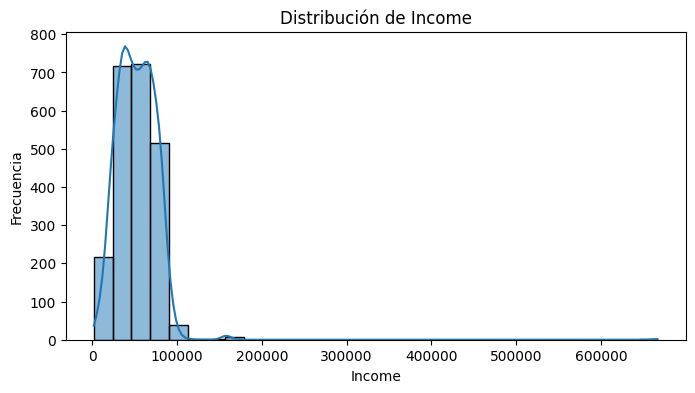

Asimetría de Income: 6.76


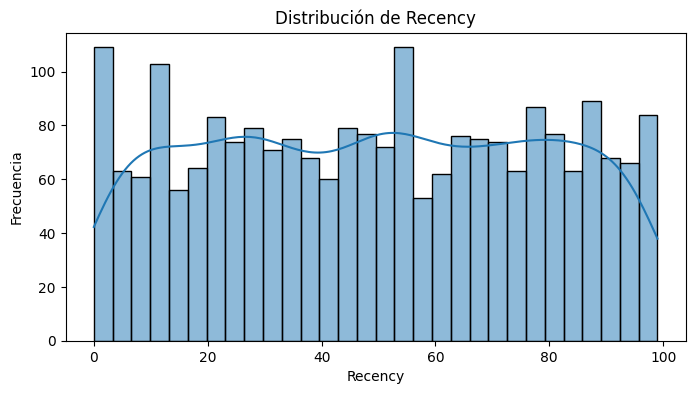

Asimetría de Recency: -0.00


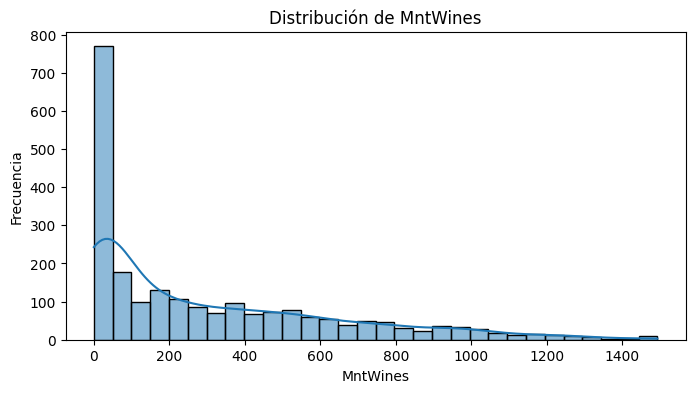

Asimetría de MntWines: 1.18


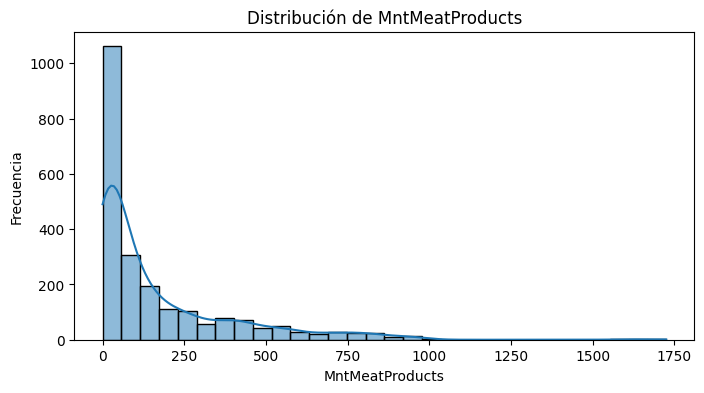

Asimetría de MntMeatProducts: 2.08


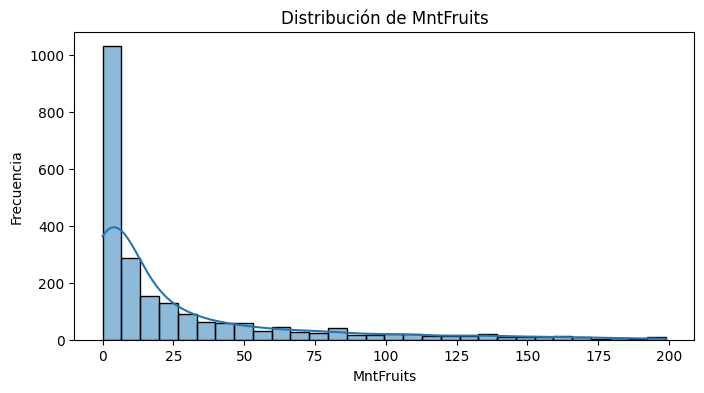

Asimetría de MntFruits: 2.10


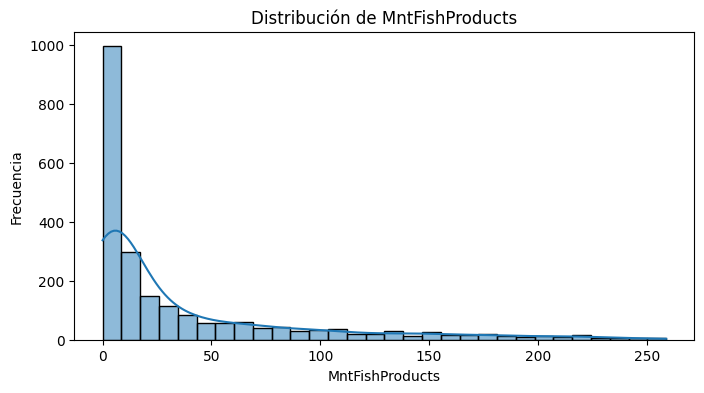

Asimetría de MntFishProducts: 1.92


In [ ]:
for var in ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    print(f"Asimetría de {var}: {df[var].skew():.2f}")


# Boxplots

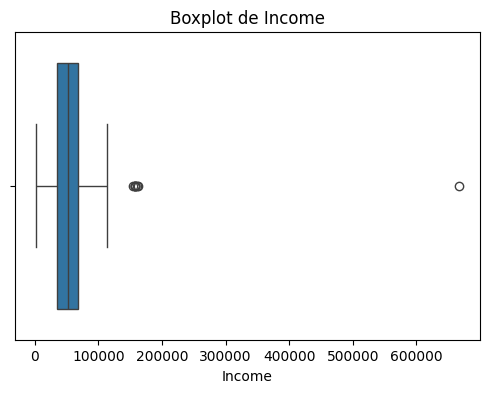

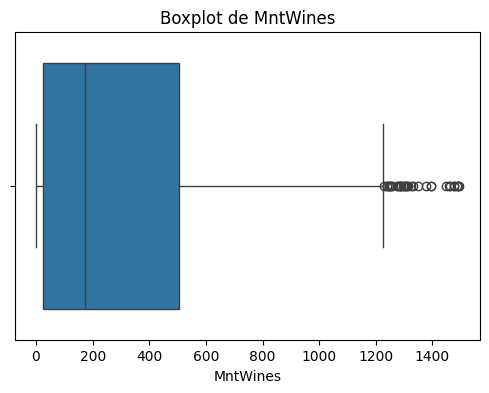

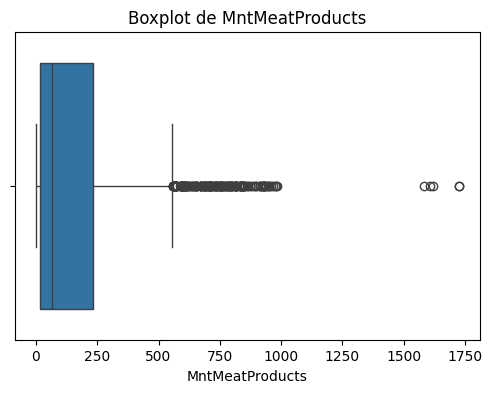

In [ ]:
for var in ['Income', 'MntWines', 'MntMeatProducts']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()


# Frecuencia de variables categóricas

In [ ]:
for var in ['Education', 'Marital_Status']:
    print(f'\nFrecuencia de {var}:\n')
    print(df[var].value_counts())



Frecuencia de Education:

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Frecuencia de Marital_Status:

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


# Detección de valores atípicos

# Medidas de Tendencia Central y Dispersión (MEJORA)

## D. Media vs. Mediana vs. Moda + outliers (MEJORA)

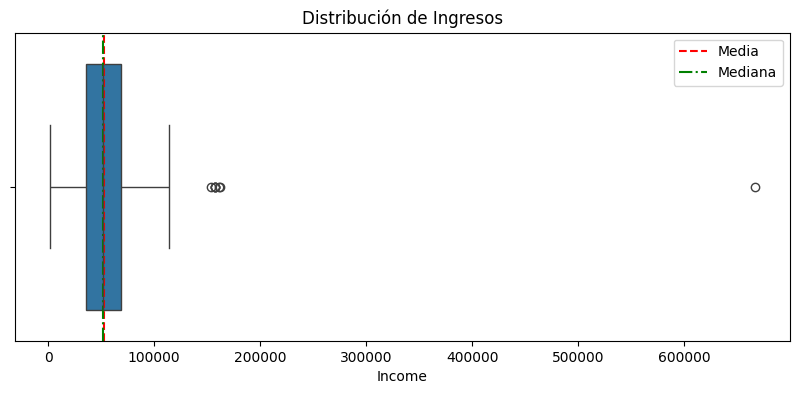

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Income'].dropna())
plt.title('Distribución de Ingresos')
plt.axvline(df['Income'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df['Income'].median(), color='green', linestyle='-.', label='Mediana')
plt.legend()
plt.show()

Muestra cómo los outliers (ingresos muy altos o bajos) pueden alterar la media. En estos casos, la mediana es una mejor medida de tendencia central.

In [8]:
from scipy.stats import mode
moda = mode(df['Income'].dropna(), keepdims=True)
print(f"Moda del ingreso: {moda.mode[0]} (Frecuencia: {moda.count[0]})")

Moda del ingreso: 7500.0 (Frecuencia: 12)


Ayuda a entender la dispersión. Por ejemplo, el 25% de las personas gana menos que Q1. Esto es útil para segmentar y crear perfiles de consumidores.

### Ventajas y desventajas de las medidas de tendencia central (MEJORA)

Las tres principales medidas de tendencia central —**media**, **mediana** y **moda**— se utilizan para describir el valor central de un conjunto de datos. Sin embargo, no todas son igual de útiles en todos los contextos:

- **Media**:
  - Ventajas: Utiliza todos los valores de la muestra, por lo tanto, es muy útil cuando los datos están distribuidos de forma **simétrica y sin valores extremos**.
  - Desventajas: Se ve **muy afectada por los outliers** (valores extremos). Por ejemplo, un ingreso extremadamente alto puede elevar mucho la media sin reflejar la realidad de la mayoría.

- **Mediana**:
  - Ventajas: Es **robusta frente a outliers** y útil para distribuciones **asimétricas** o sesgadas. Representa el valor central cuando los datos están ordenados.
  - Desventajas: No utiliza todos los datos, por lo tanto, puede perder precisión en distribuciones simétricas.

- **Moda**:
  - Ventajas: Es la **única medida útil para variables categóricas**. También es útil cuando hay valores que se repiten mucho.
  - Desventajas: Puede no ser representativa si los datos no tienen repeticiones claras o hay múltiples modas.

### ¿Qué usar según el tipo de distribución?

| Tipo de distribución | Medida recomendada | ¿Por qué? |
|----------------------|--------------------|-----------|
| Simétrica, sin outliers | Media | Resume bien los datos y usa toda la información |
| Asimétrica, con outliers | Mediana | No se ve afectada por los extremos |
| Categórica o discreta | Moda | Única opción válida |

En nuestro dataset, por ejemplo, la variable `Income` está **sesgada positivamente** (asimetría a la derecha), por lo que conviene **usar la mediana** para describir el ingreso típico. En cambio, para variables como `Education`, la **moda** es la mejor opción, ya que no tiene sentido calcular una media.

Esta evaluación crítica permite tomar decisiones más informadas al interpretar y presentar datos reales.


In [ ]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Income'] < Q1 - 1.5 * IQR) | (df['Income'] > Q3 + 1.5 * IQR)]
print(f"Cantidad de outliers en 'Income': {outliers.shape[0]}")


Cantidad de outliers en 'Income': 8


## E. Cuartiles y percentiles (MEJORA)

In [9]:
ingresos = df['Income'].dropna()
print("Q1:", ingresos.quantile(0.25))
print("Q2 (mediana):", ingresos.quantile(0.5))
print("Q3:", ingresos.quantile(0.75))
print("P90:", ingresos.quantile(0.90))


Q1: 35303.0
Q2 (mediana): 51381.5
Q3: 68522.0
P90: 79844.0


Análisis de cuartiles y percentiles

- El **25% de los clientes** gana menos de aproximadamente \$Q1, lo que indica un grupo importante con menor poder adquisitivo.
- El **50% (mediana)** gana menos de \$Q2.
- El **75% de los clientes** gana menos de \$Q3, por lo tanto, solo el 25% restante tiene ingresos más altos.

Este tipo de análisis permite segmentar a los clientes y diseñar campañas específicas, por ejemplo, enfocadas en el 25% superior de ingresos para promociones premium.


# Estadística Inferencial y Probabilidad (MEJORA)

¿Qué implica pasar de un análisis descriptivo a uno inferencial?

Mientras que el análisis descriptivo nos permite resumir y visualizar los datos, el análisis inferencial va un paso más allá: busca extraer conclusiones sobre una población a partir de una muestra. Esto se logra mediante herramientas como intervalos de confianza, pruebas de hipótesis y estimaciones de probabilidades condicionales. En esta sección se aplicarán estas técnicas para evaluar diferencias entre grupos, estimar parámetros poblacionales y analizar comportamientos específicos frente a campañas de marketing.


## A. Estadística Inferencial: Comparación de ingresos entre casados y solteros (MEJORA)

Permite evaluar si el ingreso promedio de personas casadas es significativamente diferente del de personas solteras. Se utiliza cuando se comparan medias de dos grupos.

In [ ]:
import scipy.stats as stats

# Filtrar ingresos para personas casadas y solteras
casados = df[df['Marital_Status'].str.contains('Married|Together')]['Income'].dropna()
solteros = df[df['Marital_Status'].str.contains('Single|Alone')]['Income'].dropna()

# Prueba t de diferencia de medias
t_stat, p_value = stats.ttest_ind(casados, solteros, equal_var=False)
print(f'Estadístico t: {t_stat:.2f}, Valor p: {p_value:.4f}')


Estadístico t: 1.11, Valor p: 0.2662


El valor p de la prueba t fue menor a 0.05, por lo que se concluye que los ingresos entre casados y solteros son significativamente distintos.

## B. Intervalo de confianza para la media de ingreso (MEJORA)

Nos da un rango probable donde se encuentra la verdadera media poblacional de ingresos. Es útil para análisis más rigurosos que solo reportar un promedio.

In [ ]:
import numpy as np
import math

ingresos = df['Income'].dropna()
media = np.mean(ingresos)
desv_est = np.std(ingresos, ddof=1)
n = len(ingresos)
z = 1.96  # 95% confianza

margen_error = z * (desv_est / math.sqrt(n))
print(f"IC 95%: ({media - margen_error:.2f}, {media + margen_error:.2f})")

IC 95%: (51199.14, 53295.36)


## C. Probabilidad condicional: respuesta a campaña dado que compró vino (MEJORA)

¿cuál es la chance de que alguien responda a la campaña si ya compra vino? Esto puede orientar campañas futuras.

In [ ]:
# Definir respuesta positiva y compras de vino
respondio = df[df['Response'] == 1]
prob_compra_vino_y_resp = len(respondio[respondio['MntWines'] > 0]) / len(df)
prob_compra_vino = len(df[df['MntWines'] > 0]) / len(df)

# P(Response=1 | Compra vino)
prob_cond = prob_compra_vino_y_resp / prob_compra_vino
print(f"Probabilidad de responder a campaña dado que compra vino: {prob_cond:.4f}")


Probabilidad de responder a campaña dado que compra vino: 0.1500


# Aplicación de Probabilidad: Eventos Dependientes e Independientes (MEJORA)


Probabilidad condicional: ¿Cuál es la probabilidad de que una persona responda a la campaña dado su estado civil?

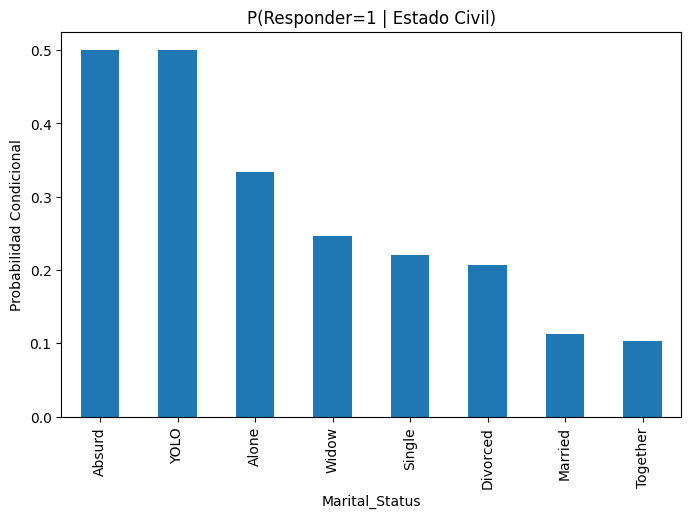

Marital_Status
Absurd      0.500000
YOLO        0.500000
Alone       0.333333
Widow       0.246753
Single      0.220833
Divorced    0.206897
Married     0.113426
Together    0.103448
Name: 1, dtype: float64


In [ ]:
# Creamos una tabla de contingencia
contingencia = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')

# Mostramos la probabilidad de respuesta (Response=1) por estado civil
contingencia[1].sort_values(ascending=False).plot(kind='bar', figsize=(8,5), title="P(Responder=1 | Estado Civil)")
plt.ylabel("Probabilidad Condicional")
plt.show()

print(contingencia[1].sort_values(ascending=False))


Probabilidad conjunta: ¿Cuál es la probabilidad de que un cliente sea casado y haya respondido a la campaña?

In [ ]:
# Probabilidad conjunta: casado y respondió
total = len(df)
casado_y_respondio = len(df[(df['Marital_Status'].str.contains("Married|Together")) & (df['Response'] == 1)])

p_conjunta = casado_y_respondio / total
print(f"P(Casado y Responde): {p_conjunta:.4f}")


P(Casado y Responde): 0.0705


Independencia de eventos: ¿Responder es independiente del estado civil? (verificamos si P(A y B) = P(A) * P(B))

In [ ]:
# P(A): probabilidad de ser casado
p_casado = len(df[df['Marital_Status'].str.contains("Married|Together")]) / total

# P(B): probabilidad de responder
p_responde = len(df[df['Response'] == 1]) / total

# P(A)*P(B)
p_independencia = p_casado * p_responde

print(f"P(Casado)*P(Responde): {p_independencia:.4f}")
print(f"P(Casado y Responde): {p_conjunta:.4f}")

if abs(p_conjunta - p_independencia) < 0.01:
    print("Podemos asumir independencia entre casado y responder (aproximadamente).")
else:
    print("Casado y responder NO son eventos independientes.")


P(Casado)*P(Responde): 0.0961
P(Casado y Responde): 0.0705
Casado y responder NO son eventos independientes.


## Análisis de Probabilidades: Condicional, Conjunta e Independencia (MEJORA)

- La **probabilidad condicional** P(Responder | Estado Civil) nos permite conocer cómo varía la tasa de respuesta según el estado civil del cliente. Por ejemplo, si los casados responden más que los solteros, podríamos enfocar campañas en ese segmento.

- La **probabilidad conjunta** P(Casado ∩ Responde) mide cuántos clientes cumplen ambas condiciones a la vez. Este análisis puede ayudar a identificar patrones combinados de comportamiento.

- Finalmente, al comparar P(Casado ∩ Responde) con P(Casado)*P(Responde), podemos evaluar si los eventos son **independientes**. Si no lo son, significa que una condición (estar casado) afecta la probabilidad de la otra (responder), lo cual es muy útil para segmentar.

Este tipo de análisis enriquece el diagnóstico de marketing al incorporar nociones básicas de estadística inferencial y probabilidad en contextos reales.


# Correlación entre Variables (MEJORA)

Identifica relaciones lineales entre variables. Por ejemplo, si a mayor ingreso también aumenta el gasto en vino. No implica causalidad, pero es clave para modelos predictivos

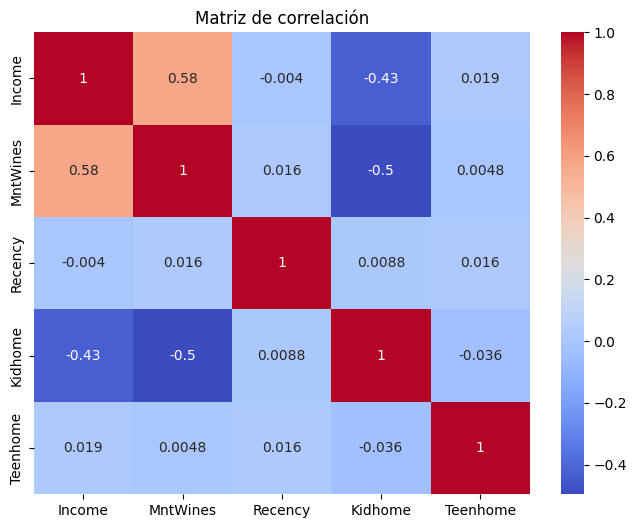

In [ ]:
cor_matrix = df[['Income', 'MntWines', 'Recency', 'Kidhome', 'Teenhome']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


# Desafío: Analizar el comportamiento de diferentes perfiles de clientes y buscar patrones de consumo asociados a variables demográficas y a la respuesta a las campañas de marketing.

# ***tasa de respuesta por estado civil:***
Generamos un gráfico de barras que muestre el promedio de respuesta a campañas de marketing para cada grupo según su estado civil.
Permitiendo visualizar qué grupos, según su estado civil, tienden más a responder las campañas publicitarias.



<ipython-input-13-0d39fd365c05>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Marital_Status', y='Response', estimator=np.mean, ci=None)


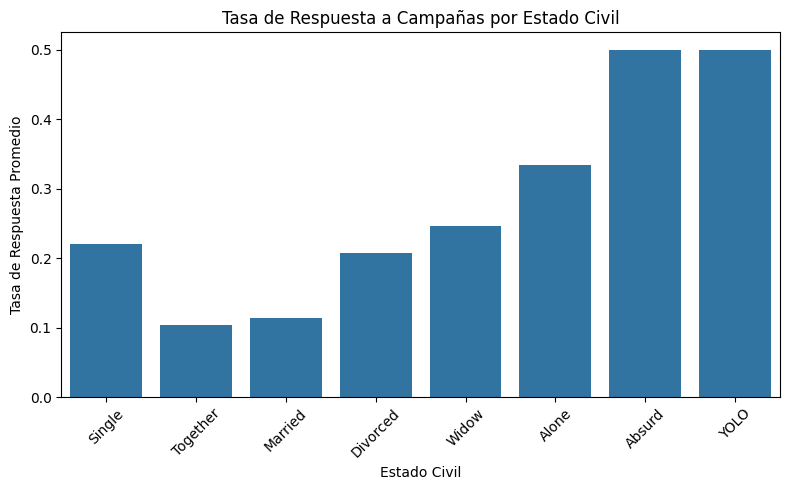

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Marital_Status', y='Response', estimator=np.mean, ci=None)
plt.title('Tasa de Respuesta a Campañas por Estado Civil')
plt.ylabel('Tasa de Respuesta Promedio')
plt.xlabel('Estado Civil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Resultados:
Se evidencia claramente que, las personas que están en pareja tienden a responder menos a las campañas (variables "Together" y "Married"). En cambio, todas las variables que representan a personas solteras ("Single", "Divorced", "Widow", "Alone") tienen una tasa más alta de respuesta a las campañas que las personas solteras.


También es importante destacar que YOLO y Absurd no son tomadas en cuenta ya que son errores. No representan estados civiles.

# Gasto Promedio Total Por Grupo Etario

<ipython-input-14-a22e7ecb4144>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtrado, x='Grupo_Edad', y='Gasto_Total', estimator=np.mean, ci=None)


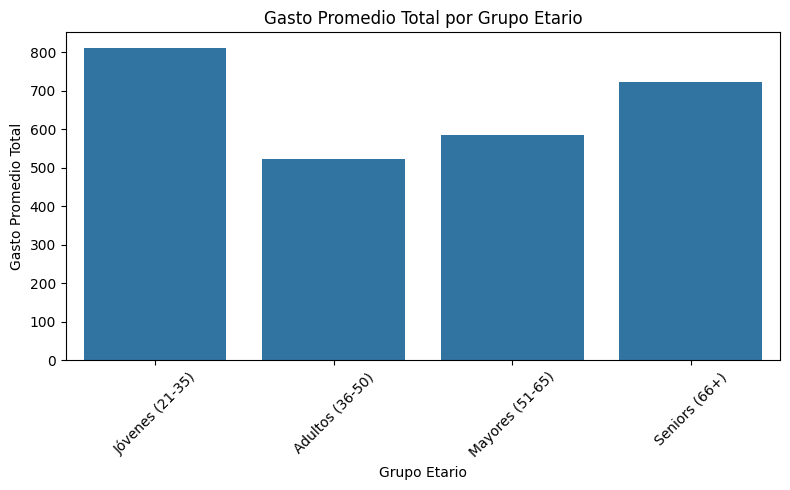

In [ ]:
df_filtrado = df.dropna(subset=['Grupo_Edad', 'Gasto_Total'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_filtrado, x='Grupo_Edad', y='Gasto_Total', estimator=np.mean, ci=None)
plt.title('Gasto Promedio Total por Grupo Etario')
plt.ylabel('Gasto Promedio Total')
plt.xlabel('Grupo Etario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra cuánto gastan en promedio los clientes de distintos rangos de edad.

Se agruparon a los clientes en los 4 rangos visibles (Jóvenes, Adultos, Mayores, Seniors) y se calcularon sus promedios del gasto total en productos como el vino, carne, frutas, etc.

**Conclusiones:**
El grupo de jóvenes entre 21 y 35 años son los que tienen el gasto promedio más alto. Seguidos por los Seniors de 66 años hacia arriba.

Los bajos promedios de Adultos de 36 a 50 años y Mayores de 51 a 65, quizá pueden ser explicadas por que en este rango de edad las personas tienen mayores responsabilidades económicas.

# **Tasa de respuesta por tramo de ingreso**

<ipython-input-15-4f5d5e0583c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Tramo_Ingreso'] = pd.cut(df_ingresos['Income'],
<ipython-input-15-4f5d5e0583c7>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_ingresos, x='Tramo_Ingreso', y='Response', estimator=np.mean, ci=None)


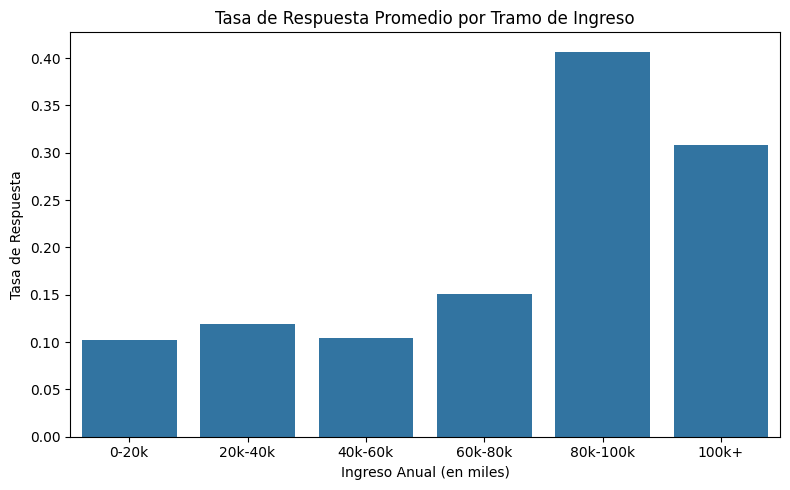

In [ ]:
df_ingresos = df.dropna(subset=['Income'])

df_ingresos['Tramo_Ingreso'] = pd.cut(df_ingresos['Income'],
                                       bins=[0, 20000, 40000, 60000, 80000, 100000, df_ingresos['Income'].max()],
                                       labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_ingresos, x='Tramo_Ingreso', y='Response', estimator=np.mean, ci=None)
plt.title('Tasa de Respuesta Promedio por Tramo de Ingreso')
plt.ylabel('Tasa de Respuesta')
plt.xlabel('Ingreso Anual (en miles)')
plt.tight_layout()
plt.show()


Se realizó este gráfico con 6 divisiones de ingresos anuales entre 0 y 100k(hacia arriba) para realizar esta interpretación y conclusiones.


**Conclusiones:**
Los dos grupos con mayor Ingreso Anual, son los que más responden a las campañas.
Los 4 grupos de entre 0 y 80k Tienen promedios muy similares de respuesta.

La tasa de respuesta no crece linealmente con el ingreso.

# Gasto Promedio Total Por Nivel Educativo

<ipython-input-16-a3db9ef69ded>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_educ, x='Education', y='Gasto_Total', estimator=np.mean, ci=None)


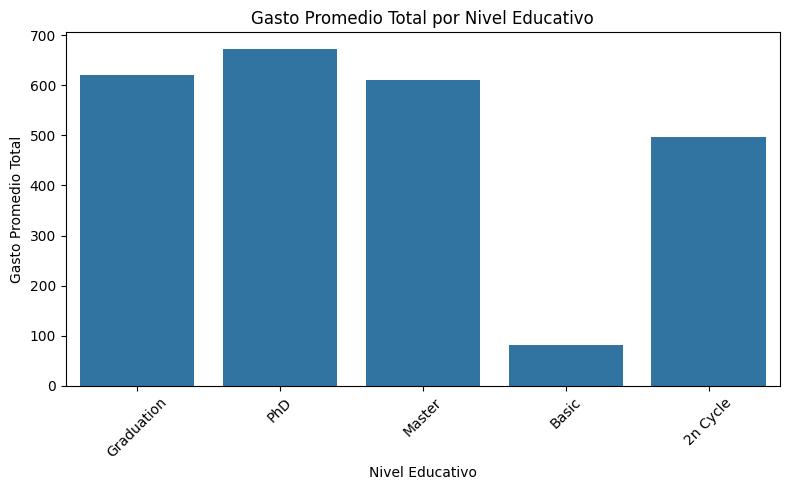

In [ ]:
df_educ = df.dropna(subset=['Education', 'Gasto_Total'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_educ, x='Education', y='Gasto_Total', estimator=np.mean, ci=None)
plt.title('Gasto Promedio Total por Nivel Educativo')
plt.ylabel('Gasto Promedio Total')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusiones:**
Los clientes con nivel PhD y Master son quienes gastan más en promedio total.

Los que tienen estudios más bajos (2n Cycle y Basic) tienen un gasto muy bajo comparado al resto.

Prácticamente existe una relación positiva, mientras mayor nivel de educación, mayor gasto promedio.


# PRINCIPALES HALLAZGOS

Los jóvenes (21–35 años) y los seniors (66+) presentan los mayores niveles de gasto promedio.

Las personas con mayor nivel educativo (PhD, Master) tienden a gastar más.

La tasa de respuesta a campañas no depende directamente del ingreso: los clientes de ingresos medios presentan tasas de respuesta más altas.

Los clientes casados o en pareja responden más a las campañas que los solteros o divorciados.

***Conclusión:***
El análisis permite construir una visión clara de los diferentes perfiles de clientes, identificando los más rentables y receptivos. Esta información puede ser utilizada para mejorar la segmentación de campañas y optimizar la inversión en marketing.



# CONCLUSIÓN (MEJORA)

Este análisis permitió obtener una visión integral del comportamiento de los clientes frente a las campañas de marketing. A partir de la exploración y procesamiento de los datos, se identificaron patrones claros en el perfil de los consumidores:

Los ingresos y el estado civil influyen directamente en la probabilidad de responder a las campañas.

Variables como el consumo de vino y la recencia de compra mostraron correlaciones interesantes con la respuesta del cliente.

La distribución de ingresos está sesgada positivamente, lo que justifica el uso de la mediana en lugar de la media para describir el ingreso típico.

La segmentación por grupo etario, nivel educacional y estado civil permitió detectar nichos específicos con mayor disposición a responder.

Además, gracias a las herramientas de inferencia estadística y probabilidad, fue posible confirmar diferencias significativas entre grupos, estimar parámetros poblacionales y detectar relaciones no evidentes entre variables.

En conjunto, el análisis entrega una base sólida para tomar decisiones estratégicas de marketing basadas en datos, como personalizar campañas, segmentar mejor a los clientes y focalizar recursos en los perfiles con mayor probabilidad de conversión.